In [ ]:
'''6 Multilayer Neural Network Model
Design and train an Artificial Neural Network (ANN) to predict diabetes diagnosis using medical data.
Dataset: Pima Indians Diabetes Dataset
Tasks:
1. Load dataset and define ANN model using Keras.
2. Use two hidden layers with ReLU activation and Sigmoid for the output layer.
3. Compile and fit the model with suitable optimizer, epochs, and batch size.
4. Evaluate performance for varying epochs and batch sizes.
5. Experiment with different activation functions.
6. Visualize the model using ANN Visualizer.'''

'6 Multilayer Neural Network Model\nDesign and train an Artificial Neural Network (ANN) to predict diabetes diagnosis using medical data.\nDataset: Pima Indians Diabetes Dataset\nTasks:\n1. Load dataset and define ANN model using Keras.\n2. Use two hidden layers with ReLU activation and Sigmoid for the output layer.\n3. Compile and fit the model with suitable optimizer, epochs, and batch size.\n4. Evaluate performance for varying epochs and batch sizes.\n5. Experiment with different activation functions.\n6. Visualize the model using ANN Visualizer.'

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("Navy Bays_pima-indians-diabetes.csv")
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(list(df.columns))

['preg', 'plas', 'pres', 'skin ', 'test', 'mass', 'pedi', 'age', 'class']


In [ ]:
df = df.dropna(how='all')

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])

print(le.classes_)

[0 1]


In [ ]:
# Standardize features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define ANN Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train,epochs=20, batch_size=16,validation_data=(X_test, y_test),verbose=1)


Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5456 - loss: 0.6996 - val_accuracy: 0.6299 - val_loss: 0.6839
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6482 - loss: 0.6625 - val_accuracy: 0.6818 - val_loss: 0.6580
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7003 - loss: 0.6318 - val_accuracy: 0.7013 - val_loss: 0.6325
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7101 - loss: 0.6030 - val_accuracy: 0.7208 - val_loss: 0.6091
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7264 - loss: 0.5754 - val_accuracy: 0.7208 - val_loss: 0.5818
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7329 - loss: 0.5499 - val_accuracy: 0.7468 - val_loss: 0.5581
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7541 - loss: 0.5264 - val_accuracy: 0.7532 - val_loss: 0.5413
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7655 - loss: 0.5080 - val_accuracy: 0.7532 - val

In [ ]:
# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7727 - loss: 0.5146
Accuracy: 0.7727272510528564


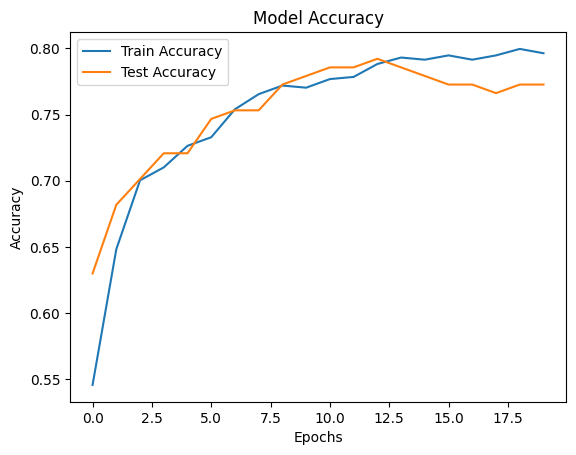

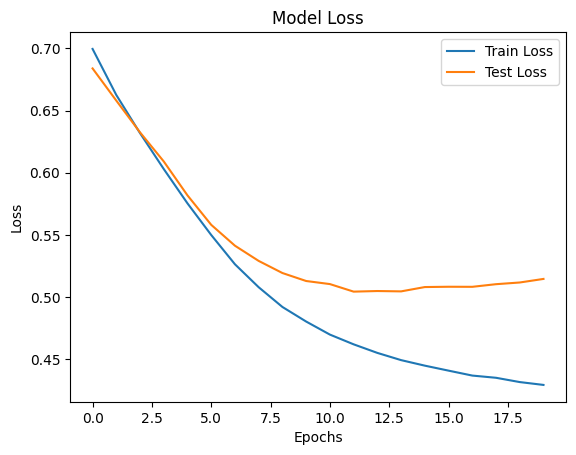

In [ ]:
# Simple Accuracy & Loss Plot

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:
# new customer values (feature order must match training)
new_customer = [[35, 1, 2, 3000, 0, 1, 15,10]]

new_scaled = scaler.transform(new_customer)

pred = model.predict(new_scaled)

if pred >= 0.5:
    print("Customer will Subscribe")
else:
    print("Customer will NOT Subscribe")


c:\Users\Vaishnavi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Customer will NOT Subscribe
